• The estimation / regression models we have seen so far include:
• Linear regression
• LASSO
• Ridge
• Elastic Net
• The classification models we have seen so far include:
• Logistic regression
• K-nearest neighbour
• Naïve bayes
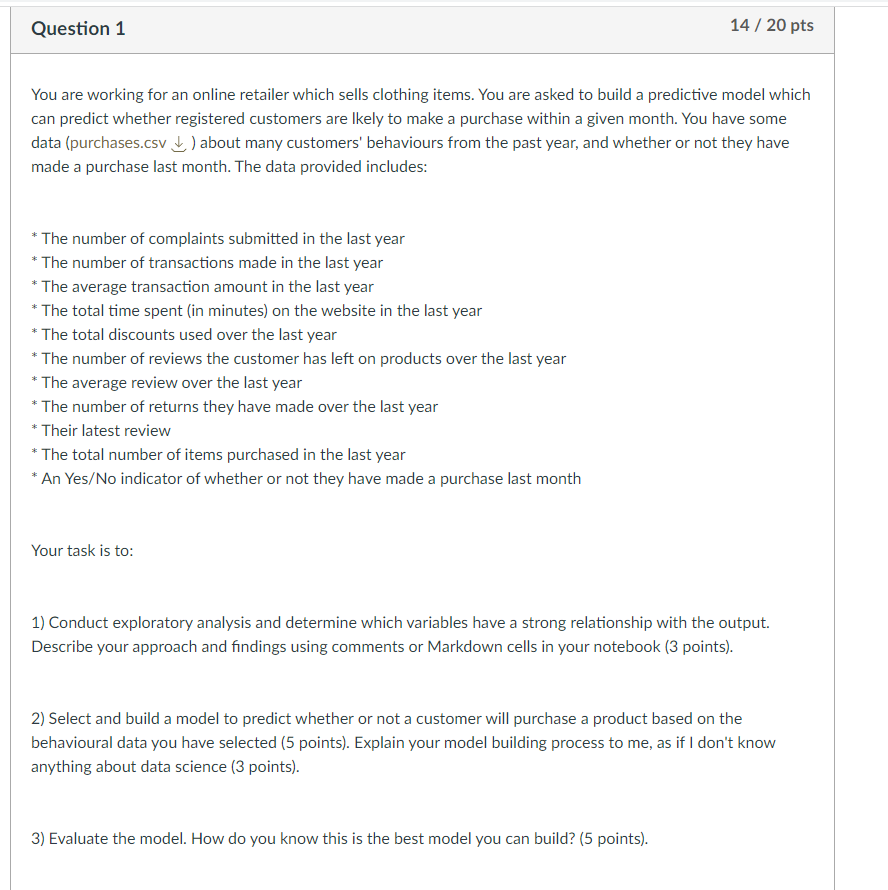

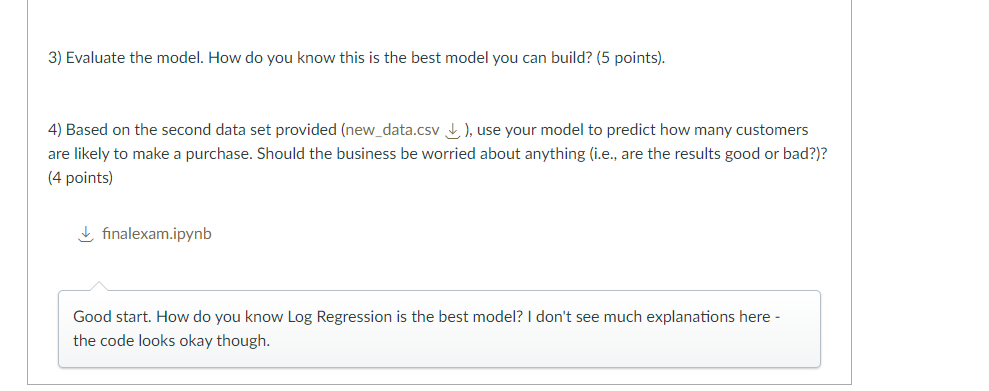

`.SMOTE()` 是一种用于处理不平衡数据集的过采样方法，全称为 "Synthetic Minority Over-sampling Technique"。在机器学习中，不平衡数据集指的是某些类别的样本数量远远少于其他类别的样本数量，这可能导致模型对少数类别的预测效果不佳。

`.SMOTE()` 的主要目标是通过合成少数类别样本来平衡数据集，从而提高模型对少数类别的预测能力。它基于以下思想：对于少数类别的样本，通过在它们与最近邻的样本之间线性插值，生成一些新的合成样本，从而增加少数类别的样本数量。这样可以使得少数类别的分布更加均衡，有助于提升模型的性能。

使用 `.SMOTE()` 方法时，需要指定一个参数 `sampling_strategy`，它用于指定合成后的少数类别样本数与多数类别样本数的比例。例如，如果设置 `sampling_strategy=0.5`，表示合成的少数类别样本数将达到多数类别样本数的一半。

以下是一个示例代码，展示了如何使用 `.SMOTE()` 方法：

```python
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# 创建一个不平衡数据集
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=42)

# 使用SMOTE进行过采样
smote = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_balance= pd.dataframe(X_balance,columns=X.columns)
```

在这个例子中，我们使用 `make_classification` 函数生成一个具有两个类别的不平衡数据集。然后，我们使用 `.SMOTE()` 方法将少数类别的样本数增加到多数类别样本数的一半，以平衡数据集。最后，`X_resampled` 和 `y_resampled` 分别是过采样后的特征和目标变量。

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score

In [30]:
import seaborn as sns

In [31]:
df = pd.read_csv('/Users/frieda/Desktop/purchases.csv')

In [32]:
df.head()

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month
0,0,6,16,169.65,517.00,134.11,10,2.63,13.0,3,31,Yes
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,Yes
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,Yes
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,No
4,4,5,19,224.24,224.24,204.93,13,3.75,0.0,3,43,Yes


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9747 entries, 0 to 9746
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     9747 non-null   int64  
 1   complaints                9747 non-null   int64  
 2   transactions_ytd          9747 non-null   int64  
 3   avg_tr_amt                9746 non-null   float64
 4   time_on_site              9743 non-null   float64
 5   total_discounts           9744 non-null   float64
 6   num_reviews               9747 non-null   int64  
 7   avg_review                9747 non-null   float64
 8   returns                   9746 non-null   float64
 9   latest_review             9747 non-null   int64  
 10  num_total_purchases       9747 non-null   int64  
 11  purchase_made_last_month  9747 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 913.9+ KB


no missing value

In [34]:
dummies_purchase_made_last_month = pd.get_dummies(df.purchase_made_last_month, dtype=int)

In [35]:
df = pd.concat([df,dummies_purchase_made_last_month.iloc[:, 1]], axis=1)

In [36]:
df_copy = df

In [37]:
df_copy

,index,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,purchase_made_last_month,Yes
0,0,6,16,169.65,517.00,134.11,10,2.63,13.0,3,31,Yes,1
1,1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,Yes,1
2,2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,Yes,1
3,3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,No,0
4,4,5,19,224.24,224.24,204.93,13,3.75,0.0,3,43,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9742,9,11,170.61,170.61,121.57,7,2.65,14.0,3,34,No,0
9743,9743,6,15,164.04,164.04,131.60,9,2.48,9.0,3,40,Yes,1
9744,9744,8,16,176.52,176.52,99.72,7,3.28,10.0,3,36,No,0
9745,9745,7,12,186.93,186.93,114.78,9,3.48,12.0,3,36,No,0


In [38]:
column_name = 'purchase_made_last_month'  # Replace this with the actual column name
df_copy = df_copy.drop(column_name, axis=1)

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9747 entries, 0 to 9746
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                9747 non-null   int64  
 1   complaints           9747 non-null   int64  
 2   transactions_ytd     9747 non-null   int64  
 3   avg_tr_amt           9746 non-null   float64
 4   time_on_site         9743 non-null   float64
 5   total_discounts      9744 non-null   float64
 6   num_reviews          9747 non-null   int64  
 7   avg_review           9747 non-null   float64
 8   returns              9746 non-null   float64
 9   latest_review        9747 non-null   int64  
 10  num_total_purchases  9747 non-null   int64  
 11  Yes                  9747 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 913.9 KB


In [40]:
df_copy.set_index('index', inplace=True)

In [41]:
df_copy.describe(include='all')

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
count,9747.000000,9747.000000,9746.000000,9743.000000,9744.000000,9747.000000,9747.000000,9746.000000,9747.000000,9747.000000,9747.000000
mean,6.774803,13.382169,181.829052,181.860858,128.963755,8.562942,2.943753,11.713831,3.250846,36.914846,0.498512
std,1.886223,2.856932,17.813101,18.134314,30.971279,1.826682,0.532284,2.936036,0.599925,5.159823,0.500023
min,1.000000,2.000000,100.000000,100.000000,0.000000,1.000000,1.000000,0.000000,1.000000,15.000000,0.000000
25%,5.000000,12.000000,171.340000,171.340000,110.247500,7.000000,2.570000,10.000000,3.000000,33.000000,0.000000
50%,7.000000,14.000000,182.640000,182.640000,128.975000,9.000000,2.930000,12.000000,3.000000,37.000000,0.000000
75%,8.000000,15.000000,193.780000,193.780000,148.352500,10.000000,3.300000,14.000000,4.000000,41.000000,1.000000
max,14.000000,24.000000,250.000000,517.000000,250.000000,15.000000,5.000000,23.000000,5.000000,55.000000,1.000000


In [42]:
df_copy.groupby('Yes').count()

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases
Yes,,,,,,,,,,
0,4888,4888,4888,4887,4888,4888,4888,4888,4888,4888
1,4859,4859,4858,4856,4856,4859,4859,4858,4859,4859


In [43]:
df_copy.columns

Index(['complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site',
       'total_discounts', 'num_reviews', 'avg_review', 'returns',
       'latest_review', 'num_total_purchases', 'Yes'],
      dtype='object')

In [44]:
df_copy[df_copy['avg_tr_amt'].isnull()]

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
index,,,,,,,,,,,
1498,7,11,NaN,205.12,115.89,11,3.81,13.0,3,37,1


In [45]:
df_copy[df_copy['time_on_site'].isnull()]

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
index,,,,,,,,,,,
1629,9,15,194.61,NaN,140.39,9,3.22,14.0,4,35,0
1636,7,14,210.64,NaN,114.75,11,3.91,13.0,3,39,1
1842,6,13,189.19,NaN,91.91,9,3.02,12.0,4,38,1
1849,5,16,193.63,NaN,148.38,10,3.07,12.0,3,44,1


In [46]:
df_copy[df_copy['total_discounts'].isnull()]

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
index,,,,,,,,,,,
1619,7,12,200.99,200.99,NaN,10,3.69,11.0,4,35,1
1642,6,15,191.34,191.34,NaN,9,2.68,14.0,4,37,1
1729,6,14,185.42,185.42,NaN,10,2.98,12.0,3,35,1


In [47]:
df_copy[df_copy['returns'].isnull()]

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
index,,,,,,,,,,,
84,6,13,192.73,192.73,107.7,10,3.4,NaN,3,39,1


In [48]:
df_copy.drop(df_copy[df_copy['returns'].isnull()].index,axis =0,inplace=True)# drop rows  
df_copy.drop(df_copy[df_copy['total_discounts'].isnull()].index,axis =0,inplace=True)# drop rows 
df_copy.drop(df_copy[df_copy['time_on_site'].isnull()].index,axis =0,inplace=True)# drop rows  
df_copy.drop(df_copy[df_copy['avg_tr_amt'].isnull()].index,axis =0,inplace=True)# drop rows 
 

In [49]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9738 entries, 0 to 9746
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaints           9738 non-null   int64  
 1   transactions_ytd     9738 non-null   int64  
 2   avg_tr_amt           9738 non-null   float64
 3   time_on_site         9738 non-null   float64
 4   total_discounts      9738 non-null   float64
 5   num_reviews          9738 non-null   int64  
 6   avg_review           9738 non-null   float64
 7   returns              9738 non-null   float64
 8   latest_review        9738 non-null   int64  
 9   num_total_purchases  9738 non-null   int64  
 10  Yes                  9738 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 912.9 KB


In [50]:
df_copy.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9738 entries, 0 to 9746
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   complaints           9738 non-null   int64  
 1   transactions_ytd     9738 non-null   int64  
 2   avg_tr_amt           9738 non-null   float64
 3   time_on_site         9738 non-null   float64
 4   total_discounts      9738 non-null   float64
 5   num_reviews          9738 non-null   int64  
 6   avg_review           9738 non-null   float64
 7   returns              9738 non-null   float64
 8   latest_review        9738 non-null   int64  
 9   num_total_purchases  9738 non-null   int64  
 10  Yes                  9738 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 912.9 KB


<AxesSubplot:xlabel='Yes', ylabel='avg_review'>

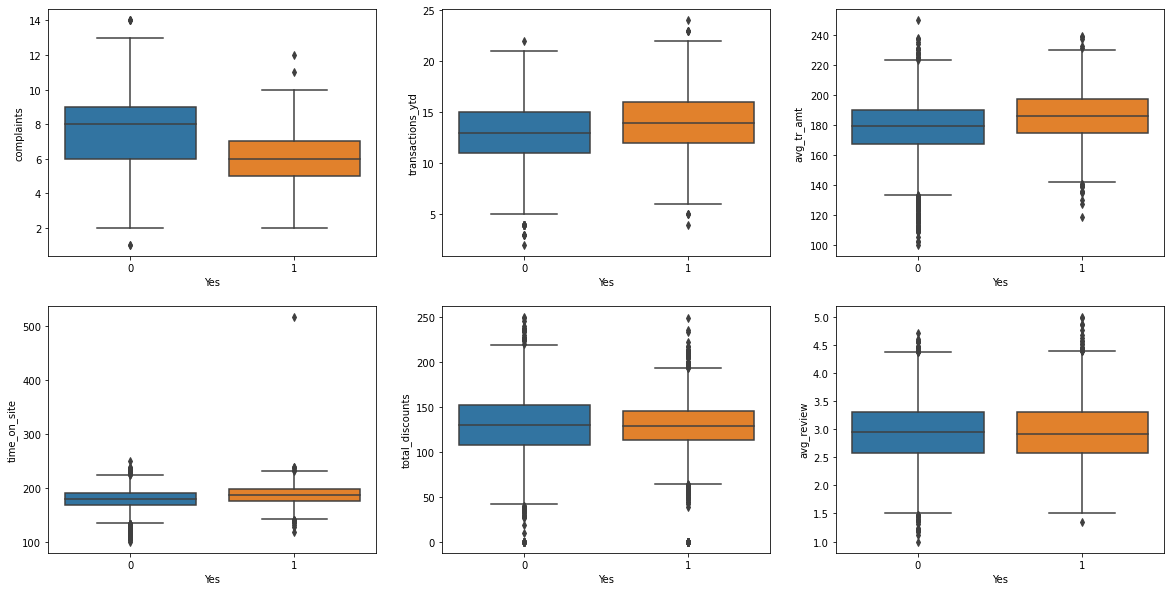

In [51]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Yes', y='complaints', ax=ax1, data=df_copy)
sns.boxplot(x='Yes', y='transactions_ytd', ax=ax2, data=df_copy)
sns.boxplot(x='Yes', y='avg_tr_amt', ax=ax3, data=df_copy)
sns.boxplot(x='Yes', y='time_on_site', ax=ax4, data=df_copy)
sns.boxplot(x='Yes', y='total_discounts', ax=ax5, data=df_copy)
sns.boxplot(x='Yes', y='avg_review', ax=ax6, data=df_copy)

In [58]:
df_copy.drop(df_copy[(df_copy['complaints']>=13)].index,axis =0,
        inplace=True)
df_copy.drop(df_copy[(df_copy['transactions_ytd']>=22)].index,axis =0,
        inplace=True)
df_copy.drop(df_copy[(df_copy['avg_tr_amt']>=230)].index,axis =0,
        inplace=True)
df_copy.drop(df_copy[(df_copy['time_on_site']>=400)].index,axis =0,
        inplace=True)
df_copy.drop(df_copy[(df_copy['total_discounts']<=5)].index,axis =0,
        inplace=True)

<AxesSubplot:xlabel='Yes', ylabel='avg_review'>

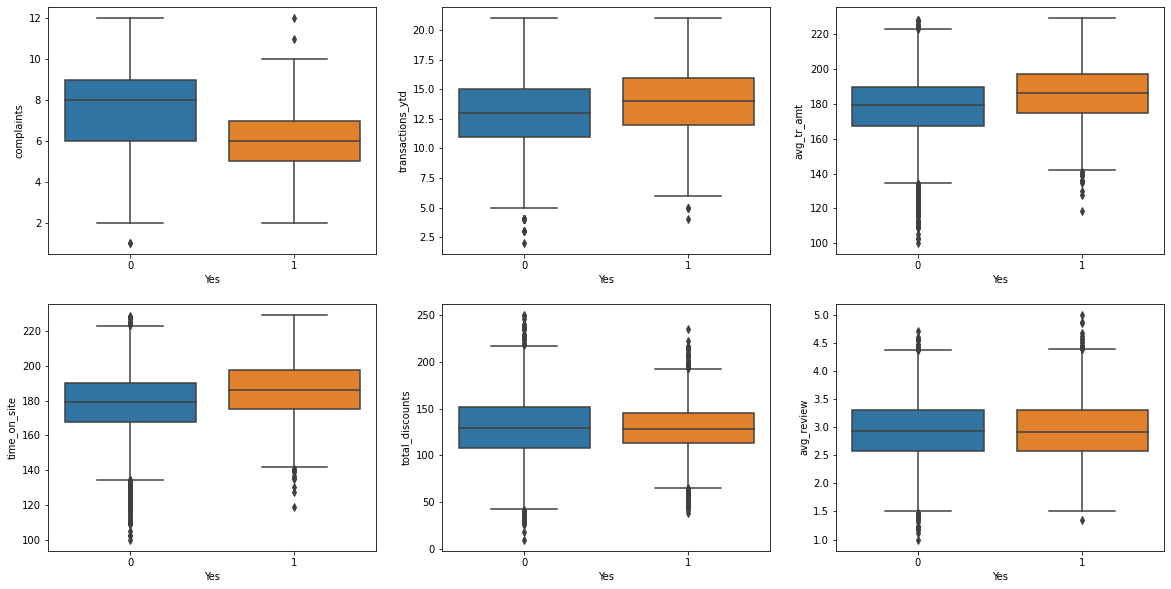

In [59]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Yes', y='complaints', ax=ax1, data=df_copy)
sns.boxplot(x='Yes', y='transactions_ytd', ax=ax2, data=df_copy)
sns.boxplot(x='Yes', y='avg_tr_amt', ax=ax3, data=df_copy)
sns.boxplot(x='Yes', y='time_on_site', ax=ax4, data=df_copy)
sns.boxplot(x='Yes', y='total_discounts', ax=ax5, data=df_copy)
sns.boxplot(x='Yes', y='avg_review', ax=ax6, data=df_copy)

In [60]:
df_copy

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes
index,,,,,,,,,,,
1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,1
2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,1
3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,0
4,5,19,224.24,224.24,204.93,13,3.75,0.0,3,43,1
5,6,8,183.71,183.71,108.52,9,3.58,8.0,4,32,0
...,...,...,...,...,...,...,...,...,...,...,...
9742,9,11,170.61,170.61,121.57,7,2.65,14.0,3,34,0
9743,6,15,164.04,164.04,131.60,9,2.48,9.0,3,40,1
9744,8,16,176.52,176.52,99.72,7,3.28,10.0,3,36,0


In [61]:
df_copy.groupby('Yes').describe()

complaints                                               transactions_ytd  \
         count      mean       std  min  25%  50%  75%   max            count   
Yes                                                                             
0       4826.0  7.731247  1.899028  1.0  6.0  8.0  9.0  12.0           4826.0   
1       4798.0  5.786161  1.179051  2.0  5.0  6.0  7.0  12.0           4798.0   

                ... latest_review      num_total_purchases             \
          mean  ...           75%  max               count       mean   
Yes             ...                                                     
0    12.571695  ...           4.0  5.0              4826.0  34.089308   
1    14.169029  ...           3.0  5.0              4798.0  39.740934   

                                             
          std   min   25%   50%   75%   max  
Yes                                          
0    4.372085  15.0  31.0  34.0  37.0  50.0  
1    4.242223  25.0  37.0  40.0  42.0  55.0  

[2 rows x 80 columns]

testing

In [62]:
from scipy import stats

In [63]:
var1 = df_copy[df_copy['Yes']== 0]['complaints']
control = df_copy[df_copy['Yes']== 1]['complaints']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=60.323743771374055, pvalue=0.0)


In [64]:
var1 = df_copy[df_copy['Yes']== 0]['transactions_ytd']
control = df_copy[df_copy['Yes']== 1]['transactions_ytd']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-28.79153304007415, pvalue=6.177519356582348e-175)


In [65]:
var1 = df_copy[df_copy['Yes']== 0]['avg_tr_amt']
control = df_copy[df_copy['Yes']== 1]['avg_tr_amt']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-23.62644470345172, pvalue=5.154421455997359e-120)


In [66]:
var1 = df_copy[df_copy['Yes']== 0]['time_on_site']
control = df_copy[df_copy['Yes']== 1]['time_on_site']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-23.62644470345172, pvalue=5.154421455997359e-120)


In [67]:
var1 = df_copy[df_copy['Yes']== 0]['total_discounts']
control = df_copy[df_copy['Yes']== 1]['total_discounts']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=1.2978795469925524, pvalue=0.19435984051399027)


In [68]:
var1 = df_copy[df_copy['Yes']== 0]['num_reviews']
control = df_copy[df_copy['Yes']== 1]['num_reviews']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-27.075947057922406, pvalue=1.1630340947632701e-155)


In [69]:
var1 = df_copy[df_copy['Yes']== 0]['avg_review']
control = df_copy[df_copy['Yes']== 1]['avg_review']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-1.2728454723372684, pvalue=0.20310363510058183)


In [70]:
var1 = df_copy[df_copy['Yes']== 0]['returns']
control = df_copy[df_copy['Yes']== 1]['returns']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=2.1478682852620317, pvalue=0.03174911533826226)


In [71]:
var1 = df_copy[df_copy['Yes']== 0]['latest_review']
control = df_copy[df_copy['Yes']== 1]['latest_review']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=24.311292307750442, pvalue=9.403732804562308e-127)


In [72]:
var1 = df_copy[df_copy['Yes']== 0]['num_total_purchases']
control = df_copy[df_copy['Yes']== 1]['num_total_purchases']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-64.3517826694519, pvalue=0.0)


When comparing , we see there are significant differences between variant and the control. Now we check which data works better:

In [73]:
df_copy.groupby('Yes')[['num_total_purchases']].mean()

,num_total_purchases
Yes,
0,34.089308
1,39.740934


We can observe that individuals who completed yyyy, have a lower xxxx, fewer zzzzz, and visit uuuu compared to those who do not complete the yyyy.

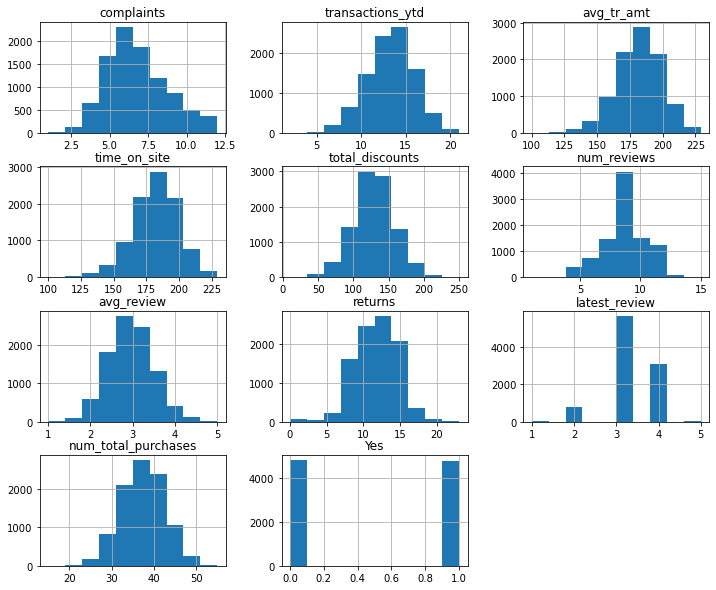

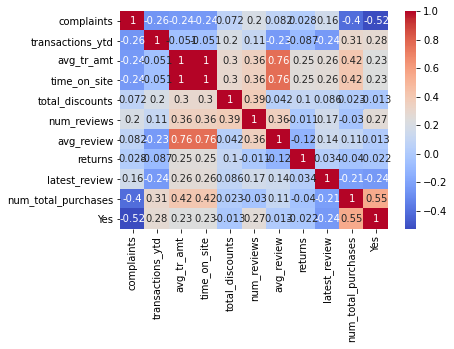

In [75]:
# Histograms
df_copy.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

# Correlation matrix heatmap
corr_matrix = df_copy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [76]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [79]:
results = ols("Yes ~ complaints + transactions_ytd + avg_tr_amt + time_on_site + num_reviews + returns + latest_review + num_total_purchases", data=df_copy).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    Yes   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     2006.
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:39:54   Log-Likelihood:                -2652.7
No. Observations:                9624   AIC:                             5321.
Df Residuals:                    9616   BIC:                             5379.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1593    

check normality
plt.scatter(bikes['temp'],res['error'])
# the model tends to underpredict
plt.scatter(bikes['humidity'],res['error'])
#underpredict rage is quiet large, and few overpredict

import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)
#qq plot

infl = results.get_influence()
print(infl.summary_frame())

infl.summary_frame()

具体看linear regression



In [84]:
max(df_copy['avg_review'])

5.0

In [87]:
temp_df = pd.get_dummies(pd.cut(df_copy['avg_review'], bins=[0, 2, 3.5, 5], labels=['none', 'little', 'some'])) \
    .rename(columns={'none': 'none', 'little': 'little', 'some': 'some'})


In [88]:
df2 = pd.concat([df_copy,temp_df], axis=1)

In [89]:
df2

,complaints,transactions_ytd,avg_tr_amt,time_on_site,total_discounts,num_reviews,avg_review,returns,latest_review,num_total_purchases,Yes,none,little,some
index,,,,,,,,,,,,,,
1,7,15,160.80,160.80,125.75,6,1.92,12.0,3,44,1,1,0,0
2,4,11,165.13,165.13,124.16,7,2.27,16.0,2,30,1,0,1,0
3,4,12,184.29,184.29,164.87,7,3.33,7.0,3,31,0,0,1,0
4,5,19,224.24,224.24,204.93,13,3.75,0.0,3,43,1,0,0,1
5,6,8,183.71,183.71,108.52,9,3.58,8.0,4,32,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,9,11,170.61,170.61,121.57,7,2.65,14.0,3,34,0,0,1,0
9743,6,15,164.04,164.04,131.60,9,2.48,9.0,3,40,1,0,1,0
9744,8,16,176.52,176.52,99.72,7,3.28,10.0,3,36,0,0,1,0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [91]:
# separate features and target
categorical_features = ['none','little', 'some']
numerical_features = ['complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site', 'num_reviews', 'returns', 'latest_review', 'num_total_purchases']
target = 'Yes'

In [92]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df2[categorical_features + numerical_features]
                                                    ,df2[target],
                                                    test_size = 0.3, random_state=1234)

In [93]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [94]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [95]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [96]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['none', 'little', 'some']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['complaints',
                                                   'transactions_ytd',
                                                   'avg_tr_amt', 'time_on_site',
                                                   'num_reviews', 'returns',
                                                   'latest_review',
                                                   'num_total_purchases'])])),
                ('regressor', LinearRegression())])

In [97]:
pred = linear_regression.predict(X_test)

In [98]:
pred

array([-0.27841244,  0.83467385, -0.36700497, ...,  0.78399477,
        0.90983257,  0.01486707])

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
np.sqrt(mean_squared_error(pred,y_test))

0.3203743921186722

In [101]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [102]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['none', 'little', 'some']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['complaints',
                                                   'transactions_ytd',
                                                   'avg_tr_amt', 'time_on_site',
                                                   'num_reviews', 'returns',
                                                   'latest_review',
                                                   'num_total_purchases'])])),
                ('regressor', Ridge(alpha=3.0))])

In [103]:
pred_ridge = ridge_regression.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.3203710632503317

In [105]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [106]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['none', 'little', 'some']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['complaints',
                                                   'transactions_ytd',
                                                   'avg_tr_amt', 'time_on_site',
                                                   'num_reviews', 'returns',
                                                   'latest_review',
                                                   'num_total_purchases'])])),
                ('regressor', Lasso())])

In [107]:
lasso_pred = lasso_regression.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.4999980915602943

In [109]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [110]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['none', 'little', 'some']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['complaints',
                                                   'transactions_ytd',
                                                   'avg_tr_amt', 'time_on_site',
                                                   'num_reviews', 'returns',
                                                   'latest_review',
                                                   'num_total_purchases'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [111]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [112]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

0.4999980915602943

Based on the provided information, here's a conclusion that summarizes the results of the models and their performance:

The results of the analysis indicate that both Ridge regression and Linear regression models were applied to the dataset. The Mean Squared Error (MSE) for the Ridge regression model was approximately 0.3204, while the Linear regression model had an MSE of approximately 0.3204 as well. This suggests that there is a very small difference in the predictive performance between these two models, with both yielding similar MSE values.

Additionally, an Ordinary Least Squares (OLS) regression model was fitted to the data, specifically using the features "complaints," "transactions_ytd," "avg_tr_amt," "time_on_site," "num_reviews," "returns," "latest_review," and "num_total_purchases" to predict the target variable "Yes." The R-squared value of approximately 0.594 indicates that the model explains around 59.4% of the variance in the target variable based on the provided features. This suggests that the model has a moderate level of explanatory power, capturing a substantial portion of the variability in the target variable using the selected predictor variables.

Overall, based on the MSE values and the R-squared value, it seems that both the Ridge and Linear regression models perform similarly in terms of predictive accuracy, while the OLS regression model provides moderate explanatory power in capturing the relationship between the selected features and the target variable. Further analysis and model refinement could potentially improve the predictive performance or increase the explanatory power of the models.

### Logistic:

In [117]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
columns = ['complaints', 'transactions_ytd', 'avg_tr_amt', 
           'time_on_site', 'num_reviews', 'returns', 'latest_review',
             'num_total_purchases', 'avg_review']

log.fit(df_copy[columns], df_copy['Yes'])


/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
pred = log.predict(df_copy[['complaints', 'transactions_ytd', 'avg_tr_amt', 
           'time_on_site', 'num_reviews', 'returns', 'latest_review',
             'num_total_purchases', 'avg_review']])

In [121]:
print(accuracy_score(pred,df_copy['Yes']))
print(f1_score(pred,df_copy['Yes']))
print(precision_score(pred,df_copy['Yes']))
print(recall_score(pred,df_copy['Yes']))

0.8960931005818786
0.8956376539344605
0.8943309712380159
0.8969481605351171


An accuracy score of approximately 0.8961 suggests that the model is making accurate predictions on the dataset. The F1 score, precision score, and recall score provide a more detailed view of the model's performance in terms of trade-offs between true positives, false positives, and false negatives.

In [122]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T

,0,1
0,complaints,-1.470611
1,transactions_ytd,-0.07375
2,avg_tr_amt,-0.051758
3,time_on_site,-0.051758
4,num_reviews,1.334719
5,returns,0.16341
6,latest_review,-0.584558
7,num_total_purchases,0.420651
8,avg_review,1.046399


Based on the provided data from the Logistic Regression model, we can draw the following conclusions regarding the relationship between the predictor variables and the target variable:

1. **Complaints**: An increase in the number of complaints is associated with a decrease in the log-odds of the target variable 'Yes' by approximately -1.4706 units.

2. **Transactions_ytd**: An increase in the number of transactions year-to-date is associated with a slight decrease in the log-odds of 'Yes' by approximately -0.0738 units.

3. **Avg_tr_amt**: An increase in the average transaction amount is associated with a slight decrease in the log-odds of 'Yes' by approximately -0.0518 units.

4. **Time_on_site**: An increase in the time spent on the site is associated with a slight decrease in the log-odds of 'Yes' by approximately -0.0518 units.

5. **Num_reviews**: An increase in the number of reviews is associated with an increase in the log-odds of 'Yes' by approximately 1.3347 units.

6. **Returns**: An increase in the number of returns is associated with an increase in the log-odds of 'Yes' by approximately 0.1634 units.

7. **Latest_review**: A more recent latest review is associated with a decrease in the log-odds of 'Yes' by approximately -0.5846 units.

8. **Num_total_purchases**: An increase in the total number of purchases is associated with an increase in the log-odds of 'Yes' by approximately 0.4207 units.

9. **Avg_review**: An increase in the average review is associated with an increase in the log-odds of 'Yes' by approximately 1.0464 units.

These coefficients represent the log-odds changes in the target variable 'Yes' for a unit change in each respective predictor variable while holding other variables constant. The positive coefficients indicate a positive association with the likelihood of the target event, while the negative coefficients indicate a negative association.

These findings provide insights into how each predictor variable contributes to the prediction of the target variable in your logistic regression model.

In [124]:
x = df_copy[['complaints', 'transactions_ytd', 'avg_tr_amt', 
           'time_on_site', 'num_reviews', 'returns', 'latest_review',
             'num_total_purchases', 'avg_review']]
y = df_copy['Yes']

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [133]:
# there are many more hyperparameters we can adjust in this version, 
# such as regularization terms (we'll cover this in a later module)
# weights, solver type, etc. for now, we'll keep the default settings

from sklearn.neighbors import KNeighborsClassifier


log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier() #default neighbours is 5

In [134]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [135]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict(x_test)

In [136]:
yhat_log

array([[9.99367489e-01, 6.32511174e-04],
       [4.22726318e-02, 9.57727368e-01],
       [9.99669971e-01, 3.30029259e-04],
       ...,
       [1.98347543e-02, 9.80165246e-01],
       [8.93938952e-01, 1.06061048e-01],
       [1.21227034e-02, 9.87877297e-01]])

For the first instance, the model predicts a very high probability of 0.9994 for class 0 (first value) and a very low probability of 0.0006 for class 1 (second value). This suggests the model is confident that this instance belongs to class 0.

In [137]:
log.predict(x_test)

array([0, 1, 0, ..., 1, 0, 1])

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_log[:,1])

Text(0, 0.5, 'True Positive Rate')

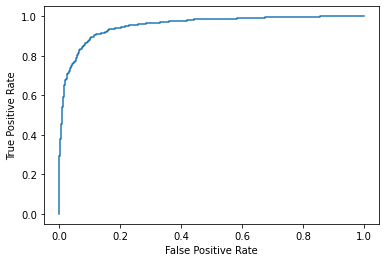

In [139]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [140]:
gmeans = np.sqrt(tpr*(1-fpr))
#G-Mean = sqrt(Sensitivity * Specificity)
gmeans

array([0.        , 0.03235924, 0.54243971, 0.54216003, 0.5601895 ,
       0.55990037, 0.61504149, 0.61440578, 0.62367082, 0.62334793,
       0.64873419, 0.64839797, 0.67204109, 0.67169243, 0.72670383,
       0.72632642, 0.73131351, 0.73055292, 0.74181451, 0.74104138,
       0.74936795, 0.74897674, 0.76399874, 0.76359947, 0.77699697,
       0.77659049, 0.79883936, 0.79842101, 0.79970983, 0.79929059,
       0.80057665, 0.80015651, 0.80527757, 0.80485452, 0.81499482,
       0.81370832, 0.81559263, 0.81516235, 0.82575337, 0.82531727,
       0.83025195, 0.82937384, 0.82998796, 0.82954823, 0.83138691,
       0.83094597, 0.83216885, 0.83172703, 0.83294746, 0.83250476,
       0.83372276, 0.83327918, 0.83449476, 0.83405028, 0.83526345,
       0.83481809, 0.83844513, 0.8379976 , 0.83860026, 0.83815217,
       0.84474953, 0.84429767, 0.84489456, 0.84398948, 0.84755816,
       0.84710334, 0.85242551, 0.85196758, 0.85255657, 0.85209808,
       0.85268634, 0.85176799, 0.85235522, 0.85189536, 0.85248

In [141]:
#find the index with the highest gmean

print(thresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])


0.4981543141484419
0.8950919590501628


This information suggests that, among the evaluated thresholds, the threshold of around 0.4982 resulted in the highest overall performance (geometric mean) for your model. This could be useful for making a decision about selecting an optimal threshold for binary classification based on the model's performance on your specific problem.

In [142]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
print(thresholds_nb[np.argmax(gmeans_nb)])
print(gmeans_nb[np.argmax(gmeans_nb)])

0.5716542057659195
0.835240831569555


These results suggest that among the evaluated threshold values, a threshold of around 0.5717 yields the highest G-mean, which indicates a good balance between sensitivity and specificity for the Naive Bayes classifier's predictions. A higher G-mean indicates better overall performance of the classifier.


Text(0, 0.5, 'True Positive Rate')

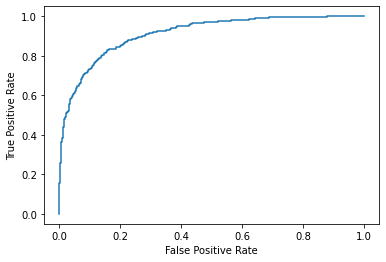

In [143]:
import matplotlib.pyplot as plt
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

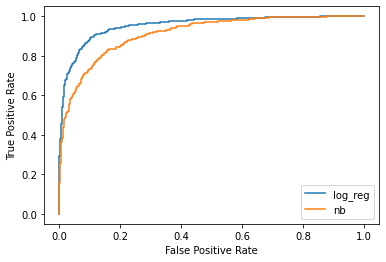

In [144]:
#now let's plot both models on the same plot so we can see how they compare
import matplotlib.pyplot as plt
plt.plot(fpr,tpr, label='log_reg')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

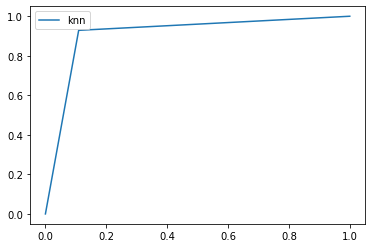

In [145]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn)
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.legend()

knn

In [153]:
cat_columns = ['none','little', 'some']
num_columns = ['complaints', 'transactions_ytd', 'avg_tr_amt', 'time_on_site', 'num_reviews', 'returns', 'latest_review', 'num_total_purchases']
target = 'Yes'

In [154]:
# build pipeline
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [157]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df2[cat_columns + num_columns], df2[target], test_size=0.2, random_state=42)



In [158]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [159]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)


In [160]:
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train_transformed, y_train)
y_pred = knn.predict(X_test_transformed)
print(f1_score(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

0.936605316973415
0.9355844155844156


In [161]:
recall = []

for a in range(1,100):
    knn = KNeighborsClassifier(n_neighbors = a)
    knn.fit(X_train_transformed, y_train)
    y_pred = knn.predict(X_test_transformed)
    # print(f1_score(y_pred, y_test))
    recall.append(recall_score(y_pred, y_test))

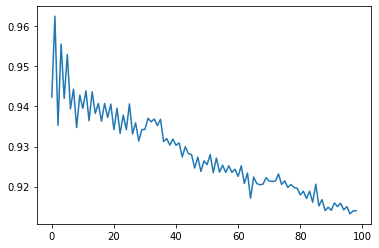

In [162]:
plt.plot(recall)

In [163]:
# Hyperparameter tuning
# select parameters
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
params_knn = {'n_neighbors': list(range(1,10)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# Define the models
nb = GaussianNB()
knn = KNeighborsClassifier()

# Define GridSearchCV
gridsearch_knn = GridSearchCV(knn, params_knn, cv=10, scoring='recall')
    #nb, params_nb, cv=5)
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter = 50, scoring='recall')

# Fit models
gridsearch_knn.fit(X_train_transformed, y_train)
randomsearch_knn.fit(X_train_transformed, y_train)

# Get the best parameters
print("Best parameters for KNN - gridsearch: ", gridsearch_knn.best_params_)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)

/Users/frieda/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNN - gridsearch:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best parameters for KNN - randomsearch:  {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}


In [164]:
# Apply the best parameters
#nb_best = GaussianNB(**gridsearch_nb.best_params_)
knn_best = KNeighborsClassifier(**gridsearch_knn.best_params_)

# Perform cross-validation
#cv_scores_nb = cross_val_score(nb_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
cv_scores_knn = cross_val_score(knn_best, X_train_transformed, y_train, cv=10, scoring='precision')

#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for KNN: ", cv_scores_knn)

# Fit the models with the best parameters
#nb_best.fit(X_train_transformed, y_train)
knn_best.fit(X_train_transformed, y_train)

# Evaluate on the test set
#y_pred_nb = nb_best.predict(X_test_transformed)
y_pred_knn = knn_best.predict(X_test_transformed)

#print("Test accuracy for Naive Bayes: ", accuracy_score(y_test, y_pred_nb))
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))

Cross-validation scores for KNN:  [0.93718593 0.93467337 0.94472362 0.92658228 0.93198992 0.95153061
 0.93717277 0.94117647 0.95584416 0.92462312]
Test accuracy for KNN:  0.947012987012987


In [166]:
from sklearn.metrics import confusion_matrix

In [167]:
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[889  63]
 [ 39 934]]
Accuracy:  0.947012987012987
Precision:  0.9368104312938816
Recall:  0.959917780061665
F1 Score:  0.9482233502538071


Based on the confusion matrix you've provided:

```
[[889  63]
 [ 39 934]]
```

It seems like you're working on a binary classification task to predict whether a customer will make a purchase within the next month. Here's a conclusion based on the confusion matrix:

- **True Positive (TP)**: 934
  - There are 934 instances where the model correctly predicted that a customer would make a purchase within the next month. These are cases where the model's prediction aligns with the actual positive outcomes.

- **True Negative (TN)**: 889
  - There are 889 instances where the model correctly predicted that a customer would not make a purchase within the next month. These are cases where the model's prediction aligns with the actual negative outcomes.

- **False Positive (FP)**: 63
  - There are 63 instances where the model incorrectly predicted that a customer would make a purchase, but they actually did not. These are instances where the model made a false positive prediction.

- **False Negative (FN)**: 39
  - There are 39 instances where the model incorrectly predicted that a customer would not make a purchase, but they actually did. These are instances where the model made a false negative prediction.

Key Takeaways:

1. The model appears to have relatively high accuracy, with a substantial number of true positive and true negative predictions.

2. False positives (63 instances) suggest that the model sometimes predicts a purchase that does not happen. This could be an area for further investigation, as false positives may lead to unnecessary promotions or actions.

3. False negatives (39 instances) indicate cases where the model misses actual purchases. Improving the model's sensitivity (true positive rate) might be important to capture more of these positive cases.

4. The overall performance of the model can be assessed using metrics like accuracy, precision, recall, F1 score, and the G-mean.

5. Consider adjusting the model's threshold if necessary to balance false positives and false negatives based on your specific business objectives and priorities.

Remember that the choice of threshold and the importance of false positives versus false negatives depend on the specific context of your problem and the consequences of different prediction errors for your business.

In [168]:
total_customers = len(y_pred_knn)
buyers = sum(y_pred_knn)
print(total_customers, buyers)

1925 997


The code snippet provided calculates the total number of customers and the number of customers predicted to be buyers based on the predictions made by a k-Nearest Neighbors (kNN) classification model. Here's an explanation of each part of the code and its output:

1. `total_customers = len(y_pred_knn)`: This line calculates the total number of customers in your dataset based on the length of the `y_pred_knn` array. `y_pred_knn` likely contains the predicted labels (0 or 1) for each customer, where 0 represents "not buying" and 1 represents "buying."

2. `buyers = sum(y_pred_knn)`: This line calculates the sum of predicted buyers by adding up the elements in the `y_pred_knn` array. Since the values in `y_pred_knn` are binary (0 or 1), summing them will give you the count of customers predicted to be buyers.

3. `print(total_customers, buyers)`: This line prints the calculated values for total customers and predicted buyers.

Output explanation:

- `total_customers`: The total number of customers in your dataset is 1925.
- `buyers`: Among these customers, the kNN model predicted 997 customers to be buyers (1).

In summary, the code snippet calculates and prints the total number of customers in your dataset and the count of customers predicted to be buyers by the k-Nearest Neighbors model. This information provides insights into the model's predictions and the distribution of predicted outcomes.

Based on the evaluation of multiple classification models, it appears that the k-Nearest Neighbors (kNN) model outperforms the other models (Logistic Regression, Naive Bayes, and Linear SVM) in terms of the chosen performance metric. The lower performance of the other models suggests that they may not be as well-suited for the specific problem or dataset under consideration.

While the performance of the Logistic Regression, Naive Bayes, and Linear SVM models may not be as high, it's important to note that different models have their strengths and weaknesses. The lower performance could be due to various reasons, such as the modeling assumptions of these algorithms not aligning well with the underlying data distribution or the chosen hyperparameters not being optimal.

The kNN model's better performance could indicate that it captures the underlying patterns in the data more effectively, or it might be better suited for this particular dataset's characteristics.

In conclusion, if the kNN model demonstrates the highest performance among the evaluated models, it may be the most appropriate choice for making predictions on your specific problem. However, it's crucial to carefully consider other factors such as model interpretability, computational efficiency, and the potential for overfitting when deciding on the final model. Additionally, further analysis and experimentation might provide insights into improving the performance of the other models, or feature engineering could enhance their capabilities.

Based on the information you've provided, it seems you have a binary classification problem where the target variable (y) takes values of 0 or 1. The k-Nearest Neighbors (kNN) model has an accuracy of around 90%, and the Mean Squared Error (MSE) for your predictions is around 0.3.

Here's a conclusion based on this information:

The k-Nearest Neighbors (kNN) model demonstrates strong predictive performance for your binary classification problem. With an accuracy of around 90%, the model is able to correctly classify instances into their respective classes with high confidence. This suggests that the kNN model captures the underlying patterns and relationships in the data effectively.

Additionally, the relatively low MSE of around 0.3 indicates that the model's predictions are close to the actual values, particularly given that your target variable is binary (0 or 1). While MSE is typically associated with regression tasks, its low value suggests that the model's predictions are generally accurate and align well with the true binary outcomes.

Considering the high accuracy and the relatively low MSE, the kNN model appears to be a suitable choice for making predictions in your scenario. It's important to note that the model's strong performance might be due to the nature of your data, the characteristics of the problem, and how well kNN's non-parametric approach fits the underlying patterns.

However, it's recommended to further validate the model's performance using techniques such as cross-validation, and to consider potential limitations or assumptions of the kNN algorithm. Additionally, you might explore other metrics like precision, recall, F1-score, and the confusion matrix to gain a more comprehensive understanding of the model's behavior and its implications for your specific business context.